# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [81]:
# stundent details example: John S. 9812
#                       student details 1: Shalev O. 9298
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: vs copilot
Goal: Make small fixes to functions and check variable accuracy to the methods during the project
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2: chat gpt
Goal: Give advices and general explanations (advantages and disadvantages) on different methods used during the experiment part.
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)

<pre>
Explanation of the Learning Problem and the Dataset:
This project addresses a binary classification problem, where the goal is to predict whether a passenger who boarded 
the Titanic survived (Survived = 1) or not (Survived = 0), based on personal attributes and travel conditions.
Two datasets are used: the training set contains 712 examples, and the test set contains 179 examples.
Each example is described by 7 features: passenger class (Pclass), sex (Sex – encoded numerically), age (Age), number of siblings/spouses aboard (SibSp),
number of parents/children aboard (Parch), ticket fare (Fare), and port of embarkation (Embarked – also numerically encoded).
The goal of the learning process is to develop an accurate model capable of predicting passenger survival based on these features.
</pre>




## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [82]:
# Import required libraries
import pandas as pd

# Load the training and test datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

# Display the first few rows of each dataset
print("Train Dataset Preview:")
print(train_df.head())

print("\nTest Dataset Preview:")
print(test_df.head())


Train Dataset Preview:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Dataset Preview:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


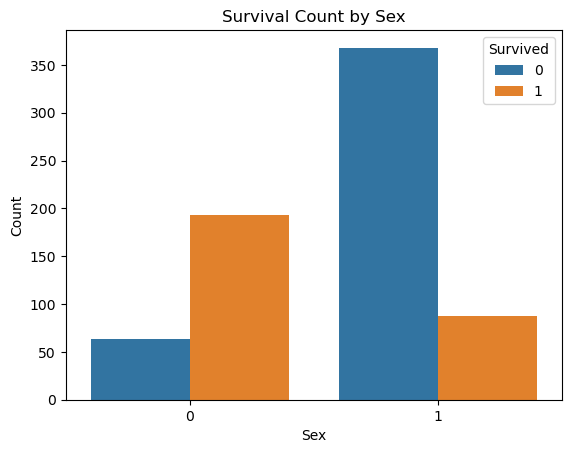

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


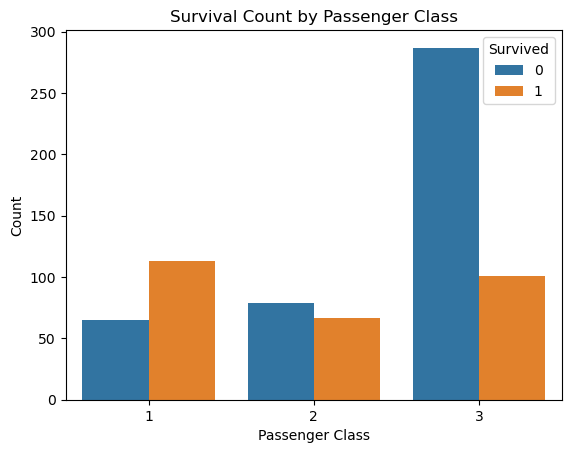

In [84]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


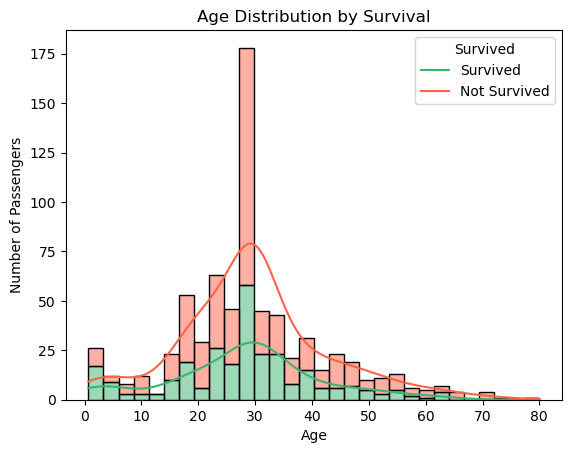

In [85]:
# Remove missing values in Age
age_df = train_df[['Age', 'Survived']].dropna()

# Define color palette: 0 = red (top), 1 = green (bottom)
palette = {0: 'tomato', 1: 'mediumseagreen'}

# Plot histogram with controlled stacking order
sns.histplot(data=age_df, x='Age', hue='Survived', kde=True, bins=30,
             multiple='stack', palette=palette, hue_order=[0, 1])

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Survived', 'Not Survived'])
plt.show()


In [86]:
# Compute correlation matrix with 'Pclass' included
correlation = train_df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

# Display as styled table (works best in Jupyter)
correlation.style.background_gradient(cmap='coolwarm').format(precision=2)




,Survived,Pclass,Age,Fare
Survived,1.00,-0.32,-0.07,0.26
Pclass,-0.32,1.00,-0.32,-0.54
Age,-0.07,-0.32,1.00,0.07
Fare,0.26,-0.54,0.07,1.00


C:\Users\shale\AppData\Local\Temp\ipykernel_41980\2592240875.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = train_df.groupby("FareGroup")["Survived"].mean() * 100
C:\Users\shale\AppData\Local\Temp\ipykernel_41980\2592240875.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=12, fontweight='bold', color='mediumseagreen')
C:\Users\shale\AppData\Local\Temp\ipykernel_41980\2592240875.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12, fontweight='bold', color='red')


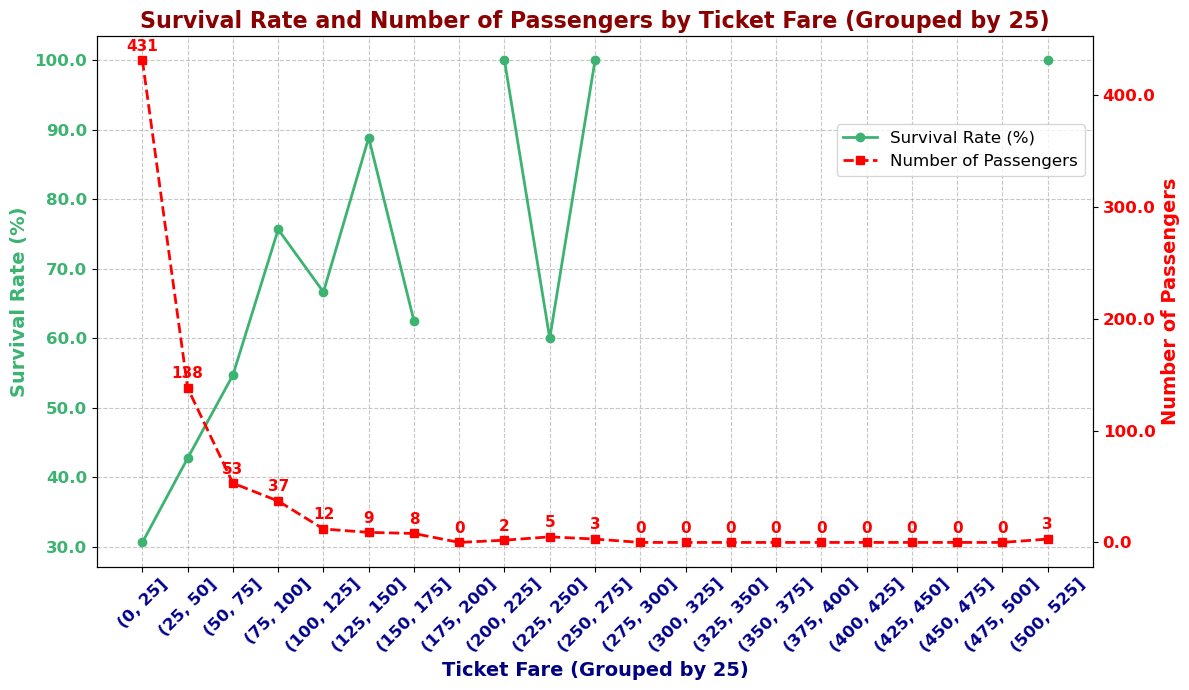

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Handle missing values in the 'Fare' column by filling them with the median
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())

# Create fare groups with 25-unit intervals
fare_bins = list(range(0, int(train_df["Fare"].max()) + 25, 25))
train_df["FareGroup"] = pd.cut(train_df["Fare"], bins=fare_bins)

# Calculate the survival rate for each fare group
survival_rates = train_df.groupby("FareGroup")["Survived"].mean() * 100

# Calculate the number of passengers in each fare group
passenger_counts = train_df["FareGroup"].value_counts().sort_index()

# Create a visualization
fig, ax1 = plt.subplots(figsize=(12, 7))

# Survival rate line (green)
ax1.plot(
    survival_rates.index.astype(str),
    survival_rates.values,
    marker='o',
    linestyle='-',
    color='mediumseagreen',
    label='Survival Rate (%)',
    linewidth=2
)
ax1.set_xlabel("Ticket Fare (Grouped by 25)", fontsize=14, fontweight='bold', color='navy')
ax1.set_ylabel("Survival Rate (%)", fontsize=14, fontweight='bold', color='mediumseagreen')
ax1.tick_params(axis='y', labelcolor='mediumseagreen')
ax1.set_xticks(range(len(survival_rates.index)))
ax1.set_xticklabels(survival_rates.index.astype(str), rotation=45, fontsize=12, fontweight='bold', color='darkblue')
ax1.set_yticklabels(ax1.get_yticks(), fontsize=12, fontweight='bold', color='mediumseagreen')

# Number of passengers line (red, secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(
    passenger_counts.index.astype(str),
    passenger_counts.values,
    marker='s',
    linestyle='--',
    color='red',
    label='Number of Passengers',
    linewidth=2
)
ax2.set_ylabel("Number of Passengers", fontsize=14, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12, fontweight='bold', color='red')
ax2.set_xticks(range(len(passenger_counts.index)))
ax2.set_xticklabels(passenger_counts.index.astype(str), rotation=45, fontsize=12, fontweight='bold', color='red')

# Add data labels to the red line (number of passengers)
for i, (x, y) in enumerate(zip(passenger_counts.index.astype(str), passenger_counts.values)):
    ax2.text(i, y + max(passenger_counts.values)*0.02, str(y), color='red', fontsize=11, fontweight='bold', ha='center')

# Title and grid
plt.title("Survival Rate and Number of Passengers by Ticket Fare (Grouped by 25)", fontsize=16, fontweight='bold', color='darkred')
ax1.grid(True, linestyle='--', alpha=0.7)

# Legends (upper right)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper right',
    bbox_to_anchor=(1, 0.85),  
    fontsize=12
)

plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Part 5 - Apply on test and show model performance estimation